<a href="https://colab.research.google.com/github/TheRadDani/Full-Adder-Perceptrons/blob/main/adder_with_perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of full Adder using Perceptrons to simulate a NAND gate (Universal unit) and fine tune the thredhold hyper-parameter of the activation function to get the best accuracy of the results

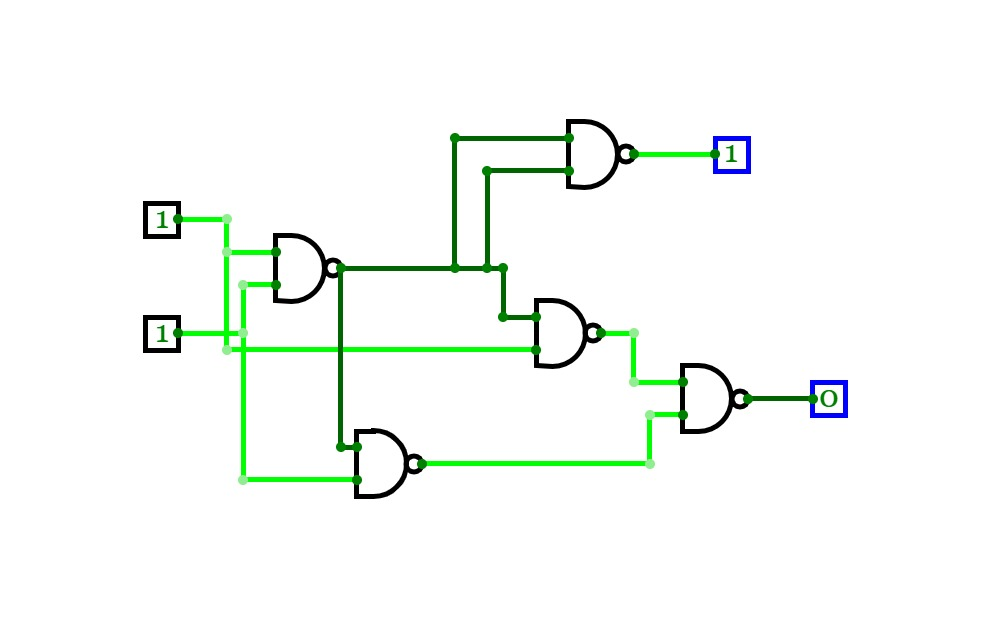

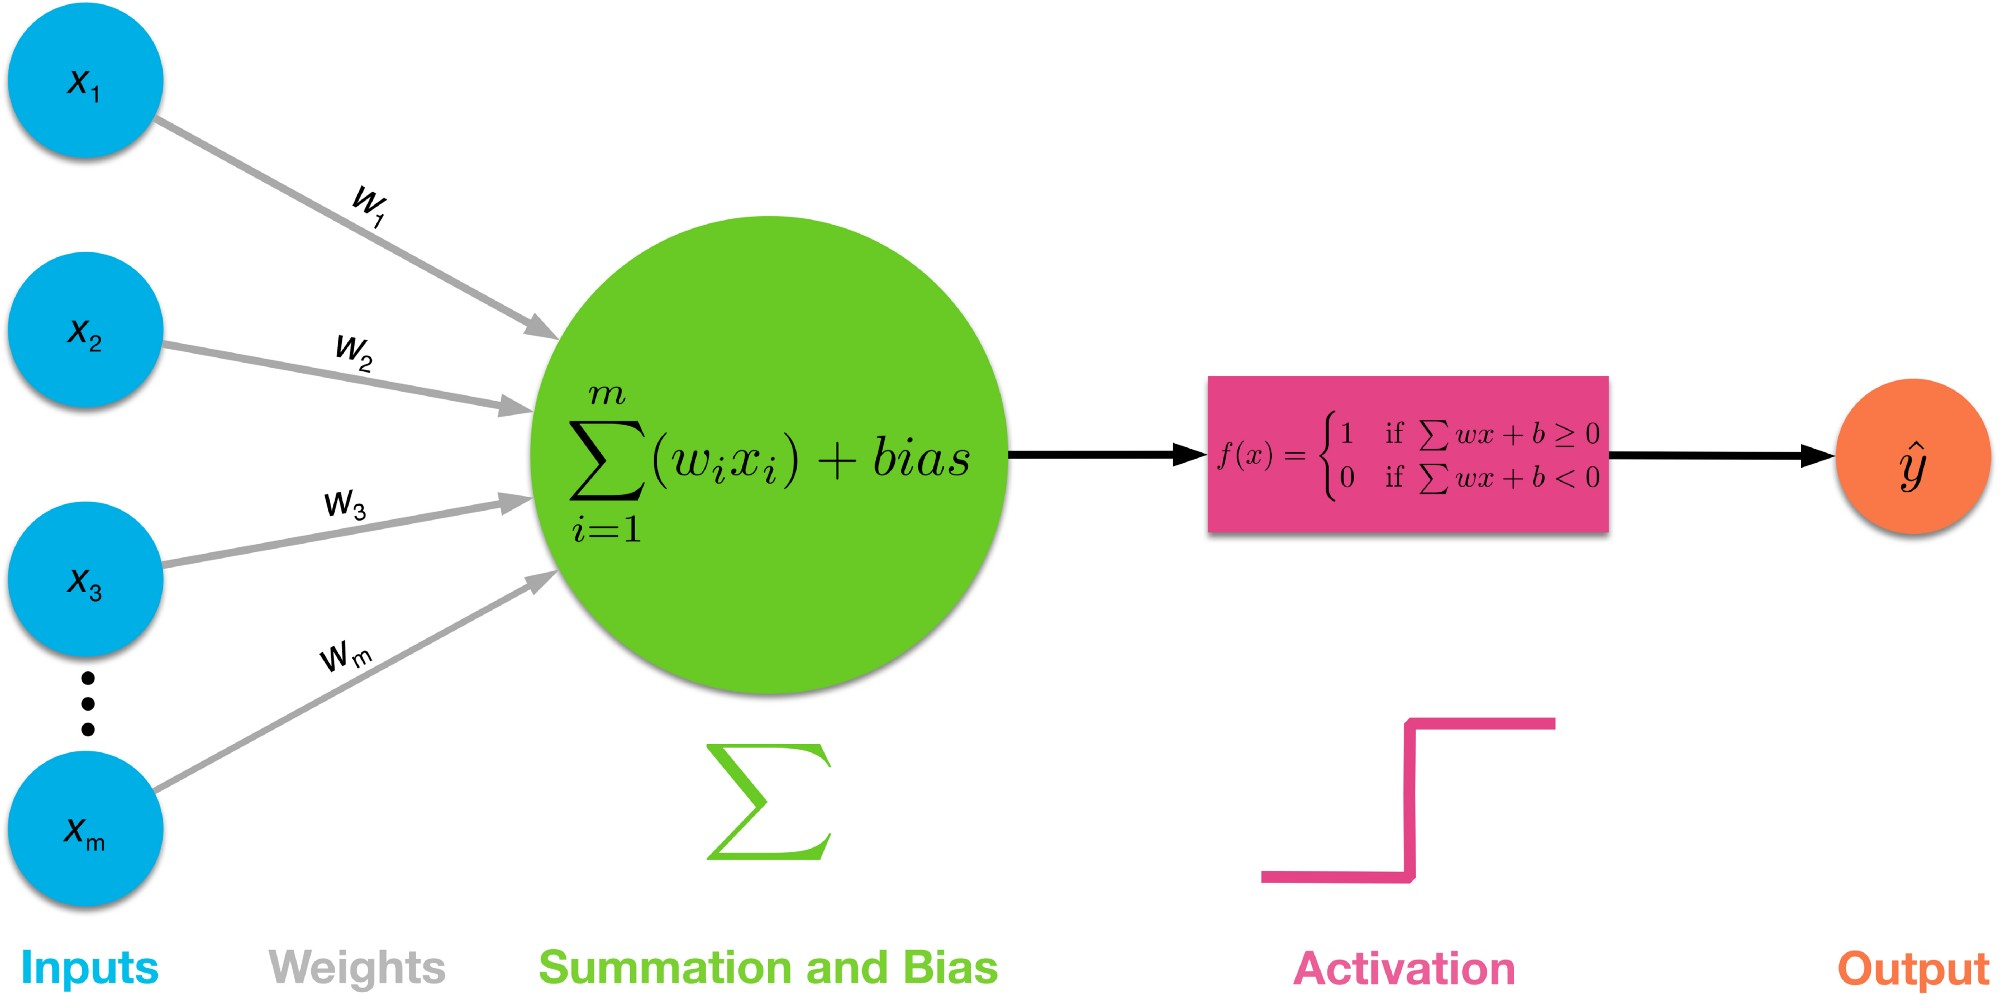

Adder with Perceptrons with learnt weights and bias

In [36]:
import numpy as np

class NAND:
    def __init__(self, threshold=0):
        self.weights = np.array([-2, -2])
        self.bias = 3
        self.threshold = threshold

    def __call__(self, x1, x2):
        inputs = np.array([x1, x2])
        output = np.sum(inputs * self.weights) + self.bias
        if output <= self.threshold:
            return 0
        else:
            return 1

def binary_adder(x1, x2, threshold):
    carry_bit = NAND(threshold)(NAND(threshold)(x1, x2), NAND(threshold)(x1, x2))
    sum_bit_0 = NAND(threshold)(x1,x2)
    sum_bit_1 = NAND(threshold)(x1,sum_bit_0)
    sum_bit_2 = NAND(threshold)(sum_bit_0,x2)
    sum_bit = NAND(threshold)(sum_bit_1,sum_bit_2)
    return (carry_bit, sum_bit)

# Train the binary adder function
inputs = [(0,0), (0,1), (1,0), (1,1)]
outputs = [(0,0), (0,1), (0,1), (1,0)]

thresholds = [-3, -2, -1, -0.5, 0, 0.5, 1, 2, 3]

best_accuracy = 0
best_threshold = 0

for threshold in thresholds:
    nand = NAND(threshold)
    lr = 0.1
    epochs = 10000

    for epoch in range(epochs):
        for i, input_pair in enumerate(inputs):
            output_pair = binary_adder(*input_pair, threshold)
            error_pair = np.array(outputs[i]) - np.array(output_pair)
            weights_sum = np.array([np.sum(np.array(input_pair)), np.sum(np.array(input_pair))])
            delta_weights = lr * error_pair * weights_sum
            nand.weights = (nand.weights + delta_weights).astype(int)
            nand.bias = (nand.bias + lr * np.sum(error_pair)).astype(int)

    # Test the binary adder function
    inputs = [(0,0), (0,1), (1,0), (1,1)]
    outputs = [(0,0), (0,1), (0,1), (1,0)]

    correct = 0
    for i, input_pair in enumerate(inputs):
        output_pair = binary_adder(*input_pair, threshold)
        if output_pair == outputs[i]:
            correct += 1

    accuracy = correct / len(inputs)
    print("Threshold: ", threshold, "Accuracy: ", accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("Best Threshold: ", best_threshold, "Best Accuracy: ", best_accuracy)

Threshold:  -3 Accuracy:  0.0
Threshold:  -2 Accuracy:  0.0
Threshold:  -1 Accuracy:  1.0
Threshold:  -0.5 Accuracy:  1.0
Threshold:  0 Accuracy:  1.0
Threshold:  0.5 Accuracy:  1.0
Threshold:  1 Accuracy:  0.0
Threshold:  2 Accuracy:  0.0
Threshold:  3 Accuracy:  0.25
Best Threshold:  -1 Best Accuracy:  1.0


## Results using the best threshold

In [37]:
import numpy as np

class NAND:
    def __init__(self,threshold=0.5):
        self.weights = np.array([-2, -2])
        self.bias = 3
        self.threshold = threshold
    def __call__(self, x1, x2):
        inputs = np.array([x1, x2])
        output = np.sum(inputs * self.weights) + self.bias
        if output <= self.threshold:
            return 0
        else:
            return 1

def binary_adder(x1, x2):
    carry_bit = NAND()(NAND()(x1, x2), NAND()(x1, x2))
    sum_bit = NAND()(x1, NAND()(x1, x2))
    return (carry_bit, sum_bit)

# Train the binary adder function
inputs = [(0,0), (0,1), (1,0), (1,1)]
outputs = [(0,0), (0,1), (0,1), (1,0)]

nand = NAND()
lr = 0.1
epochs = 10000

for epoch in range(epochs):
    for i, input_pair in enumerate(inputs):
        output_pair = binary_adder(*input_pair)
        error_pair = np.array(outputs[i]) - np.array(output_pair)
        weights_sum = np.array([np.sum(np.array(input_pair)), np.sum(np.array(input_pair))])
        delta_weights = lr * error_pair * weights_sum
        nand.weights = (nand.weights + delta_weights).astype(int)
        nand.bias = (nand.bias + lr * np.sum(error_pair)).astype(int)

# Test the binary adder function
inputs = [(0,0), (0,1), (1,0), (1,1)]
outputs = [(0,0), (0,1), (0,1), (1,0)]

correct = 0
for i, input_pair in enumerate(inputs):
    output_pair = binary_adder(*input_pair)
    if output_pair == outputs[i]:
        correct += 1

for i, (input_pair,output) in enumerate(zip(inputs,outputs)):
  print("Inputs:", input_pair,"Output:",binary_adder(*input_pair), "Expected: ", output)

Inputs: (0, 0) Output: (0, 1) Expected:  (0, 0)
Inputs: (0, 1) Output: (0, 1) Expected:  (0, 1)
Inputs: (1, 0) Output: (0, 0) Expected:  (0, 1)
Inputs: (1, 1) Output: (1, 1) Expected:  (1, 0)
